In [1]:
import os
import cv2
import selectivesearch
import sys
# print current directory
print(os.getcwd())
sys.path.append("..")  # Go up one level, adjust as necessary

from module.utils import  (
    parse_xml, 
    prepare_proposals, 
    get_proposals, 
    calculate_iou, 
    load_image, 
    get_id,
    calc_recall, 
    calc_abo,
    from_xywh_to_min_max,
    visualize_image,
    resize_boxes)
from module.dataloader import (
    PotholeDataset
)
import tqdm
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import numpy as np

/zhome/81/e/154648/repos/Object-Detection/Rasmus


In [3]:
img_path = "../Potholes/annotated-images/"
anno_path = "../Potholes/annotated-images/"
proposal_path = "tmp/"
# This does not scale. We should save annotation proposals in a file. 

IMAGE_WIDTH = 800
IMAGE_HEIGHT = 800
IMAGE_SIZE = (IMAGE_WIDTH,IMAGE_HEIGHT)


img_files = os.listdir(img_path)
proposal_files = os.listdir(proposal_path)

image_paths = np.array(list(filter(lambda file: file.endswith(".jpg"), img_files)))
label_paths = np.array(list(filter(lambda file: file.endswith(".xml"), img_files)))
proposal_paths = np.array(list(filter(lambda file: file.endswith(".xml"), proposal_files)))
# sort the files
image_paths = sorted(image_paths, key=get_id)
label_paths = sorted(label_paths, key=get_id)
proposal_paths = sorted(proposal_files, key=get_id)

boxes = [parse_xml(anno_path + label_path) for label_path in label_paths]
images = [load_image(img_path + img) for img in image_paths]

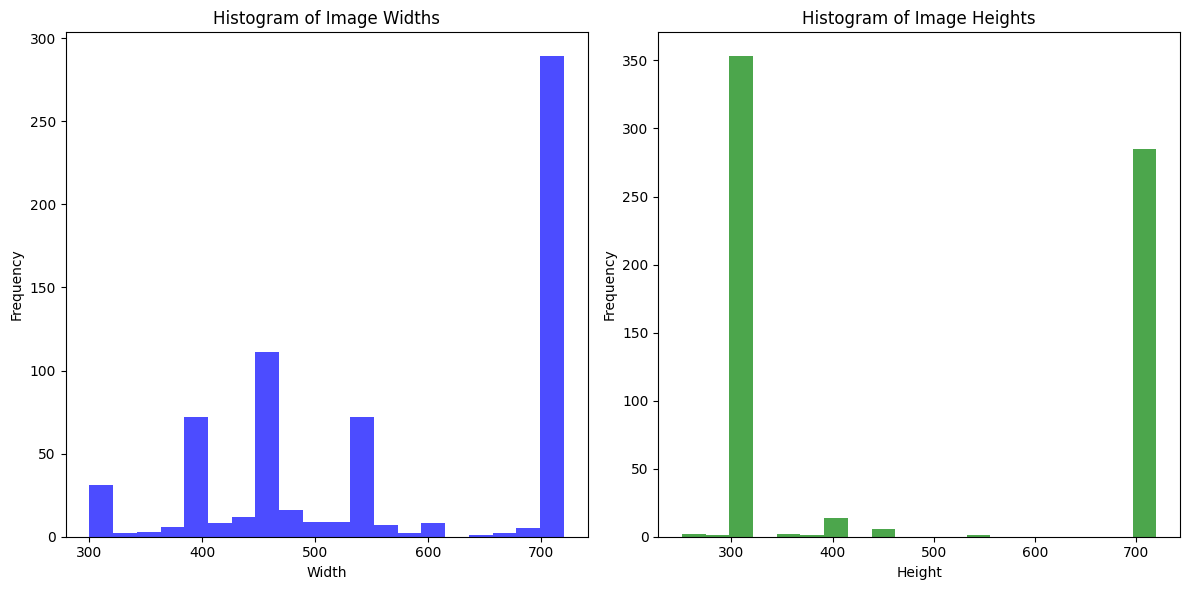

In [4]:
# Extract image shapes
image_shapes = [image.shape for image in images]

# Extract widths and heights
widths = [shape[1] for shape in image_shapes]
heights = [shape[0] for shape in image_shapes]

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='green', alpha=0.7)
plt.title('Histogram of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

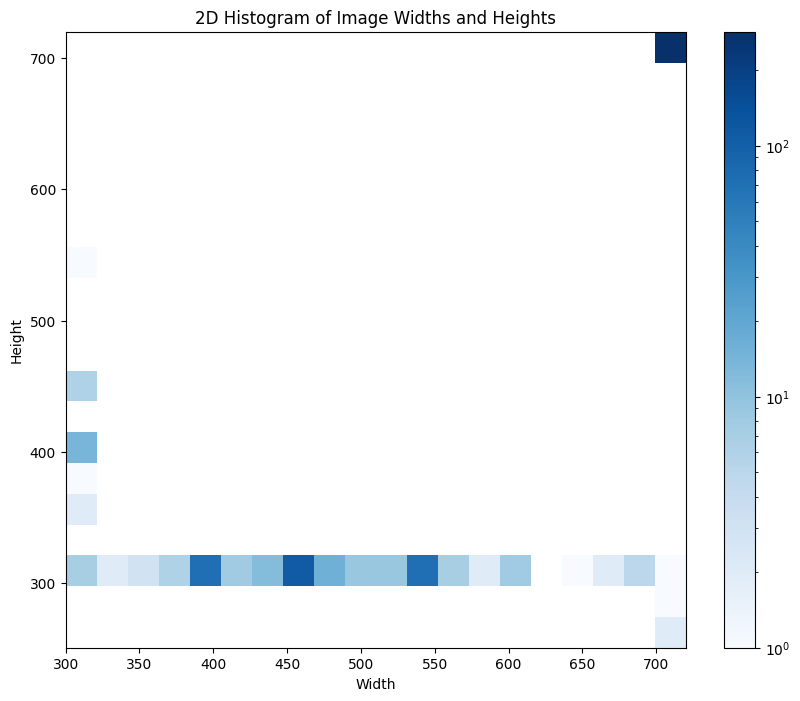

In [7]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(10, 8))
plt.hist2d(widths, heights, bins=(20, 20), cmap='Blues', norm=LogNorm())
plt.colorbar()
plt.title('2D Histogram of Image Widths and Heights')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

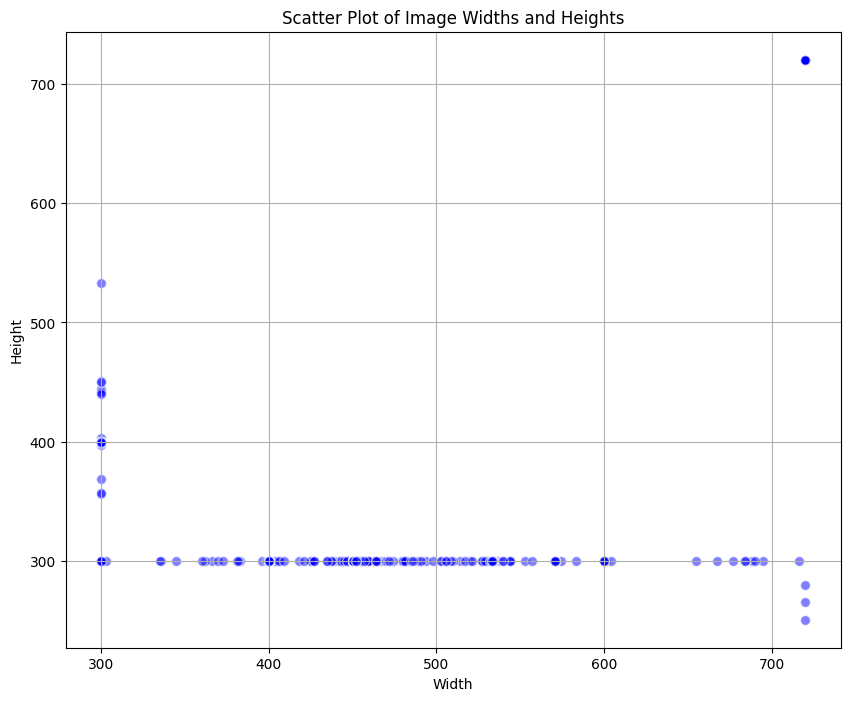

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(widths, heights, alpha=0.5, c='blue', edgecolors='w', s=50)
plt.title('Scatter Plot of Image Widths and Heights')
plt.xlabel('Width')
plt.ylabel('Height')
plt.grid(True)
plt.show()

# Analysis
From this we find a big difference between individial images. This might mean that rescaling the pictures to one resolution breaks a lot of details. Also no images have a width or height greater than 800. This means that we might not want to rescale the images.